In [25]:
import glob,os
import math
import astropy
import healpy as hp
import numpy as np
import pandas as pd
import pickle as pkl


import GCRCatalogs as gcr
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
from multiprocessing import Pool, cpu_count

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

c = 3e5
G = 4.302e-9
h = 0.71

file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"

# CosmoDC2

In [2]:
cosmodc2 = gcr.load_catalog('cosmoDC2_v1.1.4')
# cosmodc2.get_catalog_info()
gcosmology = cosmodc2.cosmology 
cosmo = FlatLambdaCDM(H0=gcosmology.H0.value, Om0= gcosmology.Om0)

In [3]:
cosmo_quantities = cosmodc2.list_all_quantities(include_native=True)

In [52]:
cl_quantities = [q for q in cosmo_quantities if 'mass' in q]
print(cl_quantities, len(cl_quantities))

['stellar_mass', 'halo_mass', 'stellar_mass_disk', 'stellar_mass_bulge', 'baseDC2/target_halo_mass'] 5


### 0.2 $\le$ Z $<$ 0.35, Mass $\ge 1e13$

In [8]:
# get list of halos in a given redshift and mass range 
# mmin_extract = 1.e13 # Msun (M_fof)
# zmin_extract = 0.2
# zmax_extract = 0.35

# cosmo_halos = Table(cosmodc2.get_quantities(['halo_mass','hostHaloMass','redshift','ra', 'dec', 'halo_id'],
#                                             filters=[f'halo_mass > {mmin_extract}','is_central==True',
#                                             f'redshift>{zmin_extract}', f'redshift<{zmax_extract}']))
# len(cosmo_halos)

13929

# Skysim5000

In [2]:
skysim = gcr.load_catalog('skysim5000_v1.1.1')

In [7]:
quantities = skysim.list_all_quantities()

In [4]:
sky_quantities = [q for q in quantities if 'mass' in q]
print(sky_quantities, len(sky_quantities))

['baseDC2/target_halo_mass', 'stellar_mass', 'halo_mass', 'stellar_mass_disk', 'baseDC2/sod_halo_mass', 'stellar_mass_bulge'] 6


In [14]:
# # get list of halos in a given redshift and mass range 
# mmin_extract = 1e13 # Msun (M_fof)
# zmin_extract = 0.2
# zmax_extract = 1

# sky_halos = Table(skysim.get_quantities(['halo_mass','hostHaloMass','redshift','ra', 'dec', 'halo_id',
#                                              'baseDC2/sod_halo_mass','baseDC2/sod_halo_radius'],
#                                             filters=[f'halo_mass > {mmin_extract}','is_central==True',
#                                             f'redshift>{zmin_extract}', f'redshift<{zmax_extract}'],
#                                                    native_filters=[f'baseDC2/sod_halo_mass>{mmin_extract}']))
# len(sky_halos)

In [27]:
### Extracted the catalog with a filter on the SOD mass
sky_halos_SOD = Table.read(file_path+"halos/Skysim_SOD_Filter/skysim_0.2-1_1.1.1_SOD.dat", format='ascii')
print(len(sky_halos_1_1_1))
sky_halos_1_1_1[:3]

9132204


halo_id,baseDC2/sod_halo_mass,halo_mass,ra,dec,redshift,baseDC2/sod_halo_radius,pixel_id
int64,float64,float64,float64,float64,float64,float64,int64
8010048272,3930589757440.0,5431825272428.169,0.31754392917391355,-39.4963737486451,0.8169700979435011,0.35036420822143555,10048
24410048272,2749749788672.0,4029018515830.9863,0.0074959202036243774,-39.65789247529022,0.8057319933823652,0.3111702501773834,10048
27410048272,4839781171200.0,6223022385757.747,0.37311149291982026,-41.06810288835421,0.8123907496935472,0.37490302324295044,10048


In [28]:
sky_halos_SOD['redshift'].min(), sky_halos_SOD['redshift'].max(), "{:e}".format(sky_halos_SOD['halo_mass'].min()), "{:e}".format(sky_halos_SOD['baseDC2/sod_halo_mass'].min())

(0.20000024465733568, 0.999999913568445, '2.160281e+11', '1.851646e+12')

In [35]:
sum(sky_halos_SOD['halo_mass']>=1e13), sum(sky_halos_SOD['baseDC2/sod_halo_mass']>=1e13)

(2149934, 1280689)

In [3]:
### Extracted the catalog with a filter on the halo mass (FoF)
sky_halos_1_2 = Table.read(file_path+"halos/skysim_0.2-1-2152757.dat", format='ascii')
print(len(sky_halos_1_2))
sky_halos_1_2[:5]

2152757


baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id
float64,float64,float64,float64,float64,float64,float64,int64,float64,int64
26579065372672.0,0.5446251034736633,0.20139660562430461,-40.04846723879825,0.9979623519401493,29968075587584.0,0.7221434040834472,21510048411,42208557165611.27,10048
12196470849536.0,0.42025429010391235,0.20235857998513196,-39.682839702198365,0.997030957534533,13286176194560.0,0.6680873385457778,25010048411,18712924217690.14,10048
37273152258048.0,0.6095867156982422,0.20127788911557642,-41.67162639435926,0.9972005247310122,48268515999744.0,0.013164711073756979,25410048411,67983825351752.12,10048
9766415892480.0,0.39577725529670715,0.22696239718685396,-39.57973265852448,0.9976410185064334,10810404372480.0,0.529586827746835,5910048401,15225921651380.283,10048
7643121319936.0,0.3648497760295868,0.23680849836272055,-39.88970382971425,0.9963994121737512,7977815769088.0,0.3147674614075478,10510048401,11236360238152.113,10048


In [23]:
sky_halos_1_2['redshift'].min(), sky_halos_1_2['redshift'].max(), "{:e}".format(sky_halos_1_2['halo_mass'].min()), "{:e}".format(sky_halos_1_2['baseDC2/sod_halo_mass'].min())

(0.20000205476847288, 0.999999913568445, '1.000255e+13', '-1.000000e+00')

In [36]:
sum(sky_halos_1_2['halo_mass']>=1e13), sum(sky_halos_1_2['baseDC2/sod_halo_mass']>=1e13)

(2152757, 1280689)

In [ ]:
%%time
skycosmology = skysim.cosmology
skycosmology.H0 ,skycosmology.Om0, skycosmology.Ob0, skycosmology.Ob0, skycosmology.h, skycosmology.Neff

In [52]:
#### Lets add the comoving and angular diameter distance columns in the sky_halos_1_2 (Mpc/h)
from colossus.cosmology import cosmology
from astropy.cosmology import FlatLambdaCDM
astropy_cosmo = FlatLambdaCDM(H0=skycosmology.H0.value, Om0=skycosmology.Om0,Ob0 = skycosmology.Ob0) # Does not incorporate h due to the non-normalized H0 value defined.
col_cosmo = cosmology.fromAstropy(astropy_cosmo,sigma8 = skycosmology.sigma8, ns= skycosmology.n_s, cosmo_name='col_cosmo')
### used this code to confirm that colossus and astropy(no h) and gcr package (astropy, no h) distance calculations are consistent 
print(col_cosmo.comovingDistance(z_max=sky_halos_1_2['redshift'][0], transverse=False) )
print(col_cosmo.angularDiameterDistance(sky_halos_1_2['redshift'][0]))

print(astropy_cosmo.comoving_distance(sky_halos_1_2['redshift'][0]).value* h)
print(((astropy_cosmo.comoving_distance(sky_halos_1_2['redshift'][0]).value * h)/(1+sky_halos_1_2['redshift'][0])))

print(skycosmology.comoving_distance(sky_halos_1_2['redshift'][0]).value * h)
print((skycosmology.angular_diameter_distance(sky_halos_1_2['redshift'][0]).value*h))

578.5422387562342
481.5582878598534
578.5422387562394
481.5580766982444
578.5422387562394
481.5580766982444


In [53]:
sky_halos_1_2['comoving_dis'] = skycosmology.comoving_distance(sky_halos_1_2['redshift']).value * h
sky_halos_1_2['Angular_dis'] = skycosmology.angular_diameter_distance(sky_halos_1_2['redshift']).value*h
sky_halos_1_2[:3]

baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id,comoving_dis,Angular_dis
float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64
26579065372672.0,0.5446251034736633,0.20139660562430461,-40.04846723879825,0.9979623519401493,29968075587584.0,0.7221434040834472,21510048411,42208557165611.27,10048,578.5422387562394,481.5580766982444
12196470849536.0,0.42025429010391235,0.20235857998513196,-39.682839702198365,0.997030957534533,13286176194560.0,0.6680873385457778,25010048411,18712924217690.14,10048,581.1804754957128,483.3670131109303
37273152258048.0,0.6095867156982422,0.20127788911557642,-41.67162639435926,0.9972005247310122,48268515999744.0,0.013164711073756979,25410048411,67983825351752.12,10048,578.216571539317,481.33456611360805


In [55]:
# sky_halos_1_2.write(file_path+"halos/skysim_0.2-1-2152757_comv&DA.dat", format='ascii') #Mpc/h

In [58]:
len(sky_halos_1_2[(sky_halos_1_2['redshift']<=0.35) & (sky_halos_1_2['redshift']<0.5)])/32

5139.3125

### Comparing the halos in SkySim5000 and cosmoDC2

In [76]:
common_halo = astropy.table.join(cosmo_halos, sky_02_1, join_type='inner', keys=['redshift'])
len(common_halo)

0

In [95]:
len(cosmo_halos[cosmo_halos['halo_mass']==13974243864518.31])
len(sky_02_1[sky_02_1['halo_mass']==13974243864518.31])

ra,redshift,halo_mass,halo_id,hostHaloMass,dec
float64,float64,float64,int64,float64,float64
53.96061524970854,0.23278120846901418,13974243864518.31,154600053401,9921713143808.0,-29.58003174126673
65.61843273894185,0.32995084928639673,13974243864518.31,389500057373,9921713143808.0,-30.07862193627271
62.599536811799446,0.32233818459939045,13974243864518.31,141900082373,9921713143808.0,-32.58130777993443
64.60383242955476,0.32040210893436205,13974243864518.31,150700097373,9921713143808.0,-34.12235725601518
55.37265585300007,0.34573518660213587,13974243864518.31,109365,9921713143808.0,-35.05240527297359


# 0.2 $<$ Z $<$ 1, Mass $\ge 1e13$

In [5]:
# mmin = 1.e13 #1.e14
zmin = 0.8
zmax = 1 #1
sky_02_1 = Table(skysim.get_quantities(['halo_mass','redshift','ra', 'dec', 'halo_id',
                                             'baseDC2/sod_halo_mass','baseDC2/sod_halo_radius'],
                                            filters=['is_central==True', f'redshift>{zmin}', f'redshift<={zmax}']))

N_halos = len(sky_02_1['ra'])
print(f'There are {N_halos} clusters in this mass and redshift range')

There are 452466474 clusters in this mass and redshift range


In [6]:
sky_02_1 = sky_02_1[sky_02_1['baseDC2/sod_halo_mass']>0]
print(len(sky_02_1))

3486615


In [7]:
'{:e}'.format(sky_02_1['baseDC2/sod_halo_mass'].min())

'1.851646e+12'

In [8]:
## Convert all the ra and dec of skysim halos to pixel id
nside = 32
pixelId = []   #162
for i in range(len(sky_02_1)):
    pixel_id = hp.pixelfunc.ang2pix(nside, sky_02_1['ra'][i], sky_02_1['dec'][i], lonlat=True)
    # print(hpix)
    pixelId.append(pixel_id)
print(len(pixelId),'\n', len(np.unique(pixelId)))

sky_02_1['pixel_id'] = pixelId
len(np.unique(sky_02_1['pixel_id']))

# sky_02_1.write(file_path+'halos/Skysim_SOD_Filter/skysim_0.8-1_1.1.1_.dat', format='ascii')


3486615 
 1588


In [ ]:
# sky_02_1 = Table.read(file_path+'halos/Skysim_SOD_Filter/skysim_0.2-0.5_1.1.1_.dat', format='ascii')

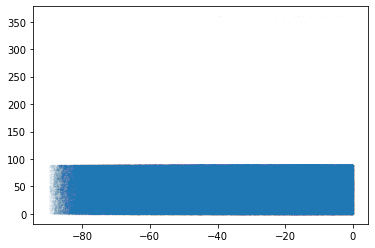

In [41]:
plt.scatter(sky_02_1['dec'],sky_02_1['ra'],marker='.', s=0.001)
plt.show()

# FOF vs SOD

In [17]:
sod = Table.read(file_path+'halos/Skysim_SOD_Filter/skysim_0.2-1_1.1.1_SOD.dat', format='ascii')
print(len(sod))
sod = sod[sod['baseDC2/sod_halo_mass']>=1e13]
print(len(sod))

9132204
1280689


In [18]:
fof_sd_s = pd.read_pickle(file_path + 'WL-Signal/skysim-full-2152757-1.1.1.csv')
print(len(fof_sd_s))
fof_sd_s = fof_sd_s[fof_sd_s['baseDC2/sod_halo_mass']>0]
print(len(fof_sd_s))

2152757
2149934


In [23]:
np.sum(np.isin(sod['redshift'], fof_sd_s['redshift']))

1280689

# $\Delta\Sigma$ measurements (SkySim5000)

In [5]:
skycosmology = skysim.cosmology # Cosmological parameters
cosmoskysim = FlatLambdaCDM(H0=skycosmology.H0.value, Om0= skycosmology.Om0)

In [ ]:
# # Get the neighbouring pixels 
# hpix_list = skysim.available_healpix_pixels   # Load all the available pixels of cosmoDC2 catalog
# # hpix = hpix_list[14] # First pixel
# hpix_neighbors = hp.pixelfunc.get_all_neighbours(32, hpix)
# hpix_toread = list(set(hpix_list) & set(hpix_neighbors)) + [hpix]
# print(hpix, '\n' ,len(hpix_list))

In [13]:
halos_5241 = Table.read('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/halos/skysim_0.2-1-5241.dat', format='ascii')
halos_5241[:5]

baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id
float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
104281671729152.0,1.0513720512390137,0.8488817872538275,-89.67921871564947,0.9804736609879691,95467308318720.0,3.6961427313157635,235612284266,134460997632000.0,12284.0
81814295150592.0,0.9104071259498596,0.5593153131379538,-87.5070818151548,0.9970970882466081,87854646558720.0,85.48134526741944,1332112277315,123738938815098.6,12277.0
126876555149312.0,1.0648847818374634,0.5705594459023275,-86.88132966661455,0.9796146262383763,131072419430400.0,59.247561996235746,580412277307,184609041451267.62,12277.0
105536431325184.0,1.0627847909927368,0.8667800476318284,-87.33224284819404,0.9689065185124965,100706665103360.0,89.34979655570908,2639012277259,141840373385014.1,12277.0
-1.0,-1.0,0.5419131214002648,-87.2347553912253,0.9850092843443261,450769165746176.0,2.970430812092282,1231412276323,634886148938276.1,12276.0


In [22]:
'{:e}'.format(halos_5241['halo_mass'].max())

'1.947381e+15'

In [41]:
undone_WL = halos_5241.to_pandas()[~pd.Series(halos_5241['halo_id']).isin(list(set(sky_02_1['halo_id'])))]
undone_WL = undone_WL.reset_index(drop=True)

In [42]:
undone_WL

,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id
0,-1.000000e+00,-1.000000,0.751209,-82.856675,1.006219,1.661309e+12,6.390553,1748212228279,2.339871e+12,12228.0
1,3.213585e+12,0.296351,0.453958,-78.551038,1.020623,3.754964e+12,5.410352,971812144338,5.288682e+12,12144.0
2,4.562589e+12,0.333030,0.446377,-77.899704,1.005946,5.684305e+12,33.869763,859712111338,8.006063e+12,12111.0
3,5.601136e+12,0.376451,0.613507,-74.697585,1.011817,5.386758e+12,76.194721,586012076307,7.586983e+12,12076.0
4,5.149128e+13,0.853829,0.999048,-75.153411,1.008635,6.018791e+13,74.427401,1298012076241,8.477170e+13,12076.0
...,...,...,...,...,...,...,...,...,...,...
188,-1.000000e+00,-1.000000,0.937926,-2.704028,0.992630,1.016365e+12,76.566658,2833306363253,1.431500e+12,6363.0
189,-1.000000e+00,-1.000000,0.547404,-2.279047,0.992552,9.479919e+11,26.186360,414306345315,1.335200e+12,6345.0
190,-1.000000e+00,-1.000000,0.807352,-2.121150,1.001181,7.428730e+11,6.364839,1551706338272,1.046300e+12,6338.0
191,-1.000000e+00,-1.000000,0.874141,-0.552678,0.998462,5.137304e+11,78.225191,1971406236259,7.235640e+11,6236.0


In [48]:
# for i in range(len(np.unique(undone_WL['pixel_id']))):
#     s_ds = pd.DataFrame(columns=['halo_id','radius','sigma','DS'])
#     s_ds.to_pickle('/global/homes/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/clusters-skysim/skysim-{}.csv'.format(np.unique(undone_WL['pixel_id'])[i]))

In [18]:
sky_02_1[sky_02_1['pixel_id']==[10048]]

baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id,comoving_dis,Angular_dis
float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64
26579065372672.0,0.5446251034736633,0.20139660562430461,-40.04846723879825,0.9979623519401493,29968075587584.0,0.7221434040834472,21510048411,42208557165611.27,10048,578.5422387562394,481.5580766982444
12196470849536.0,0.42025429010391235,0.20235857998513196,-39.682839702198365,0.997030957534533,13286176194560.0,0.6680873385457778,25010048411,18712924217690.14,10048,581.1804754957128,483.3670131109303
37273152258048.0,0.6095867156982422,0.20127788911557642,-41.67162639435926,0.9972005247310122,48268515999744.0,0.013164711073756979,25410048411,67983825351752.12,10048,578.216571539317,481.33456611360805
9766415892480.0,0.39577725529670715,0.22696239718685396,-39.57973265852448,0.9976410185064334,10810404372480.0,0.529586827746835,5910048401,15225921651380.283,10048,648.2421221165553,528.3308792533717
7643121319936.0,0.3648497760295868,0.23680849836272055,-39.88970382971425,0.9963994121737512,7977815769088.0,0.3147674614075478,10510048401,11236360238152.113,10048,674.8550234645385,545.642291719298
8215986176000.0,0.37367770075798035,0.23176066467426137,-40.1511492375722,0.9961442131763996,8650529701888.0,0.10232040373252264,17410048401,12183844650546.479,10048,661.2273360360831,536.8147847219528
11708611428352.0,0.4205550253391266,0.23887678422841274,-39.946522386286986,0.9985839597124821,11909720965120.0,0.022875024241410996,73110048401,16774254880450.705,10048,680.429044170169,549.2306037472067
32636646981632.0,0.5917994976043701,0.22901029830508346,-39.26761959832306,0.9970071714861173,32890964410368.0,0.12805312592424875,75110048401,46325301986433.805,10048,653.7879409713665,531.9629476441323
8230769524736.0,0.3794264495372772,0.2570435013059529,-39.9882721329609,0.9994565606394468,8188500901888.0,0.6369831913747234,20210048392,11533099861814.086,10048,729.1444340130892,580.0470972210389


In [2]:
file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"
sky_02_1 = Table.read(file_path + 'halos/skysim_0.2-1-2152757_comv&DA.dat', format='ascii')
print(len(np.unique(sky_02_1['pixel_id'])))
# sky_02_1 = sky_02_1[np.isin(sky_02_1['pixel_id'],[6080,10048])][714:720]
# sky_02_1

1580


In [44]:
import glob,os
import math
import astropy
import healpy as hp
import numpy as np
import pandas as pd
import pickle as pkl


import GCRCatalogs as gcr
from astropy.table import Table
from astropy.coordinates import SkyCoord
from multiprocessing import Pool, cpu_count

import warnings
warnings.filterwarnings('ignore')

c = 3e5
G = 4.302e-9
nside = 32
h = 0.71
skysim = gcr.load_catalog('skysim5000_v1.1.1')
skycosmology = skysim.cosmology
# skycosmology = skysim.cosmology # Cosmological parameters
# cosmoskysim = FlatLambdaCDM(H0=skycosmology.H0.value, Om0= skycosmology.Om0)

file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"
sky_02_1 = Table.read(file_path + 'halos/skysim_0.2-1-2152757_comv&DA.dat', format='ascii')
sky_02_1 = sky_02_1[np.isin(sky_02_1['pixel_id'],[6080,10048])][714:720]

## Get the neighboring pixels
def wlsignal(hpixels):
    for i in range(len(hpixels)):
        hpix = hpixels[i]
        hpix_list = skysim.available_healpix_pixels
        hpix_neighbors = hp.pixelfunc.get_all_neighbours(nside, hpix)
        hpix_toread = list(set(hpix_list) & set(hpix_neighbors))
        hpix_toread.append(hpix)
        # print(hpix_toread)

        ## Getting the source galaxies
        ra_gal = []
        dec_gal = []
        z_gal = []
        kappa = []
        shear1 = []
        shear2 = []

        ## getting galaxies
        for hpix_i in hpix_toread:
            galaxy_data = skysim.get_quantities(['ra', 'dec', 'redshift', 'convergence', 'shear_1', 'shear_2'], filters=
                                                ['convergence != 0','mag_i < 25'],  native_filters=f'healpix_pixel == {hpix_i}')
            ra_gal.extend(galaxy_data['ra'])
            dec_gal.extend(galaxy_data['dec'])
            z_gal.extend(galaxy_data['redshift'])
            kappa.extend(galaxy_data['convergence'])
            shear1.extend(galaxy_data['shear_1'])
            shear2.extend(galaxy_data['shear_2'])

        ra_gal = np.array(ra_gal)
        dec_gal = np.array(dec_gal)
        z_gal = np.array(z_gal)
        kappa = np.array(kappa)
        shear1 = np.array(shear1)
        shear2 = np.array(shear2)
        chi_s = skycosmology.comoving_distance(z_gal).value * h #this step takes some time, Mpc/h

        ### Clusters within each pixel_id
        cluster_data = sky_02_1[sky_02_1['pixel_id'] == hpix]
        halo_id_list = cluster_data['halo_id']
        nhalo = len(cluster_data)
        # print(nhalo) #len(ra_gal),
        
        pixel_results = []
        
        ## Compute the lensing signal for each cluster
        for i in (halo_id_list):
            
            haloid = i
            ra_cl = float(sky_02_1['ra'][sky_02_1['halo_id']==i])
            dec_cl = float(sky_02_1['dec'][sky_02_1['halo_id']==i])
            z_cl = float(sky_02_1['redshift'][sky_02_1['halo_id']==i])
            chi_l = float(sky_02_1['comoving_dis'][sky_02_1['halo_id']==i])  # Mpc/h

            sel = (z_gal > z_cl + 0.1) & (z_gal < 2 * z_cl)
            ra_gal_sel = ra_gal[sel] 
            dec_gal_sel = dec_gal[sel]
            chi_s_sel = chi_s[sel]

            c1 = SkyCoord(ra_gal_sel, dec_gal_sel, unit='degree')
            c2 = SkyCoord(ra_cl, dec_cl, unit='degree')
            sep = c1.separation(c2).degree

            pa = c1.position_angle(c2).rad
            # chi_l = skysim.comoving_distance(z_cl).value * h #Replace this with the present column in the data to reduce computation time


            Sigma_crit = (c**2 /(4 * np.pi* G)) * ((chi_s_sel * (1+ z_cl)) / (chi_l * (chi_s_sel - chi_l)))

            w = Sigma_crit**(-2)
            Sigma = kappa[sel] * Sigma_crit

            gammat = + shear1[sel] * np.cos(-2*pa) - shear2[sel] * np.sin(-2*pa)
            DS = gammat * Sigma_crit

            rp = sep * np.pi / 180. * chi_l / (1 + z_cl)  #Mpc/h

            # making profiles
            nbins = 15
            rp_bins = np.logspace(-1, 2, nbins+1) # pMpc
            mean_Sigma = np.zeros(nbins)
            mean_rp = np.zeros(nbins)
            mean_DS = np.zeros(nbins)
            for ibin in range(nbins):
                sel = (rp > rp_bins[ibin])&(rp <= rp_bins[ibin+1])
                mean_Sigma[ibin] = np.sum(Sigma[sel]*w[sel])/np.sum(w[sel])
                mean_rp[ibin] = np.sum(rp[sel]*w[sel])/np.sum(w[sel])
                mean_DS[ibin] = np.sum(DS[sel]*w[sel])/np.sum(w[sel])
                
            pixel_results.append({'halo_id': haloid,
                                  'radius': mean_rp.tolist(),
                                  'sigma': mean_Sigma.tolist(),
                                  'DS': mean_DS.tolist()})
        pixel_df = pd.DataFrame(pixel_results)
        # pixel_df.to_pickle(file_path + 'clusters-skysim/skysim-{}.csv'.format(hpix))

    print('Done!!!')

In [45]:
procs = 1
df_chunks = np.array_split(np.unique(sky_02_1['pixel_id']) ,procs)
# df_chunks
if __name__ == '__main__':
    with Pool(processes=procs) as p:
        p.map(wlsignal, df_chunks)

Done!!!


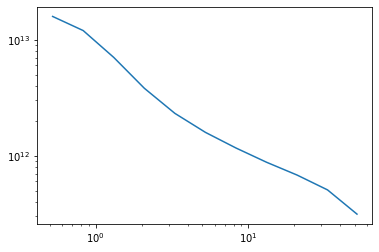

In [7]:
plt.loglog(combined_csv['radius'].mean(),combined_csv['DS'].mean(axis=0))
plt.show()

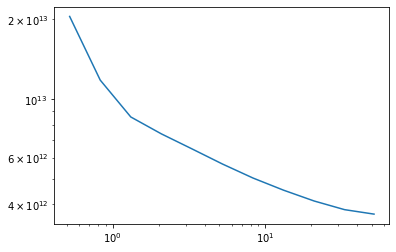

In [8]:
plt.loglog(combined_csv['radius'].mean(),combined_csv['sigma'].mean())
plt.show()

# Merging files

In [43]:
# filepath = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/clusters-skysim/'
# def delete_all_files_in_folder(folder_path):
#     try:
#         # List all items in the folder
#         folder_items = os.listdir(folder_path)
        
#         # Construct full paths for each item
#         items_full_paths = [os.path.join(folder_path, item) for item in folder_items]

#         # Delete each file
#         for item_path in items_full_paths:
#             if os.path.isfile(item_path):
#                 os.remove(item_path)
        
#         print(f"All files in {folder_path} deleted successfully.")
    
#     except Exception as e:
#         print(f"An error occurred while deleting files in {folder_path}: {e}")


# delete_all_files_in_folder(filepath)

All files in /global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/clusters-skysim/ deleted successfully.


In [13]:
file_path

'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/'

In [3]:
all_filenames = [i for i in glob.glob(file_path+ 'clusters-skysim/skysim-*.csv'.format('csv'))]
print(len(all_filenames))
combined_csv = pd.concat([pd.read_pickle(f).reset_index(drop=True) for f in all_filenames])
print(len(combined_csv))

1580
2152757


In [21]:
merged_halos = sky_02_1.to_pandas().merge(combined_csv, how='left', on='halo_id')
print(len(merged_halos))
merged_halos[:3]

2152757


,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id,comoving_dis,Angular_dis,radius,sigma,DS
0,2.657907e+13,0.544625,0.201397,-40.048467,0.997962,2.996808e+13,0.722143,21510048411,4.220856e+13,10048,578.542239,481.558077,"[0.1308730625060924, 0.20814712387717377, 0.33...","[115148363120795.56, 51872210454439.24, 229531...","[-130550254502468.84, -76217790266760.5, -3994..."
1,1.219647e+13,0.420254,0.202359,-39.682840,0.997031,1.328618e+13,0.668087,25010048411,1.871292e+13,10048,581.180475,483.367013,"[0.13261201512396317, 0.20923342305629689, 0.3...","[7445362739885.1875, 8543016543686.46, -375534...","[-51159678940917.43, -21245333215964.383, -223..."
2,3.727315e+13,0.609587,0.201278,-41.671626,0.997201,4.826852e+13,0.013165,25410048411,6.798383e+13,10048,578.216572,481.334566,"[0.13437702148667455, 0.21206787125180884, 0.3...","[98287762786790.84, 51371879042919.66, -144157...","[-171453712604657.56, -101776907593780.67, -73..."


In [22]:
merged_halos['DS'] = merged_halos['DS'].apply(np.array)
merged_halos['sigma'] = merged_halos['sigma'].apply(np.array)
merged_halos['radius'] = merged_halos['radius'].apply(np.array)

In [24]:
# merged_halos.to_pickle('/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/WL-Signal/skysim-full-DS_S-2152757.csv')

In [38]:
# col = lambda x: np.unique(len(x))
# [col(full[cols]) for cols in full.columns]

In [32]:
halos_100 = pd.read_pickle(file_path+ 'Done-SkySim/skysim-1897091.csv')

In [33]:
full_catalog = pd.concat([halos_100,merged_halos], ignore_index=True)

In [34]:
len(halos_100['halo_id']), len(merged_halos['halo_id']), len(sky_02_1['halo_id']), full_catalog.shape

(1897091, 255666, 2152757, (2152757, 13))

In [20]:
# ## Filter out the dones halos
# sky_02_1_filtered = sky_02_1.to_pandas()[~pd.Series(sky_02_1['halo_id']).isin(list(halos_100['halo_id']))]
# print(len(sky_02_1_filtered))

255666


In [21]:
sky_02_1_filtered[:3]

,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id
46482,4.330117e+13,0.789746,0.915048,-43.003122,0.986949,4.127854e+13,-0.00110,1107810176253,5.813880e+13,10303
92290,2.328602e+13,0.622234,0.697223,-44.798049,1.014469,2.839578e+13,2.98636,467510305286,3.999405e+13,10428
92296,8.260337e+12,0.440673,0.707876,-44.989679,1.015741,7.881714e+12,3.00811,653610305286,1.110101e+13,10429


In [23]:
sky_02_1_filtered = Table.from_pandas(sky_02_1_filtered)

In [24]:
# sky_02_1_filtered.write('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/halos/sky_02_1_255666.dat', format='ascii')

In [10]:
sky_02_1_filtered = Table.read('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/halos/sky_02_1_255666.dat', format='ascii')

In [11]:
len(sky_02_1_filtered)

255666